In [18]:
import pandas as pd
import json
import itertools
import numpy as np

def Customer_File():
  
  input_file = open('/content/CustomerData.json')
  json_array = json.load(input_file)

  id       = []
  type_    = []
  duration = []

  for i in json_array['Customer']:
    id.append(i['Id'])
    type_.append(i['type'])
    duration.append(i['duration'])

    customer = [(a, b, c) for (a, b, c) in itertools.zip_longest(
        id, type_, duration)]

  return customer


def Teller_File():

  input_file = open('/content/TellerData.json')
  json_array = json.load(input_file)
  
  teller_id     = []
  specialtyType = []
  multiplier    = []

  for i in json_array['Teller']:
    teller_id.append(i['ID'])
    specialtyType.append(i['SpecialtyType'])
    multiplier.append(i['Multiplier'])

    teller = [(a, b, c) for (a, b, c) in itertools.zip_longest(
        teller_id, specialtyType, multiplier)]

  return teller


In [19]:
a = Customer_File()

b = Teller_File()



In [21]:
customer = pd.DataFrame(a, columns=['id','type','duration'])

customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   object
 1   type      5000 non-null   object
 2   duration  5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [22]:
for i in customer.columns:

  unique_val = np.unique(customer[i])

  count_val = len(unique_val)

  if count_val < 10:
    print('The number of unique values for {} -- {} : {}'.format(i,count_val, unique_val))

  else: 
    print('The number of  unique values for {}:{}'.format(i,count_val))



The number of  unique values for id:5000
The number of unique values for type -- 4 : ['1' '2' '3' '4']
The number of unique values for duration -- 6 : ['10' '15' '20' '30' '45' '5']


In [23]:
teller = pd.DataFrame(b, columns=['ID','SpecialtyType','Multiplier'])

teller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             149 non-null    object
 1   SpecialtyType  149 non-null    object
 2   Multiplier     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [24]:
for i in teller.columns:

  unique_val = np.unique(teller[i])

  count_val = len(unique_val)

  if count_val < 10:
    print('The number of unique values for {} -- {} : {}'.format(i,count_val, unique_val))

  else: 
    print('The number of unique values for {}:{}'.format(i,count_val))

The number of unique values for ID:149
The number of unique values for SpecialtyType -- 4 : ['0' '1' '2' '3']
The number of unique values for Multiplier -- 5 : ['0.5' '0.75' '0.8' '0.9' '1']


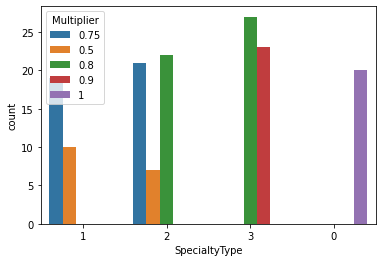

In [45]:
import seaborn as sns

sns.countplot(data = teller, x = teller['SpecialtyType'], hue = 'Multiplier')

In [ ]:
sns.countplot(data = customer, x = customer['type'])

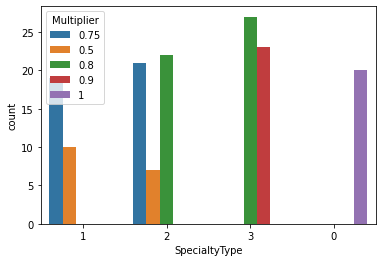

In [26]:
sns.countplot(data = teller, x = teller['SpecialtyType'],hue = teller['Multiplier'])

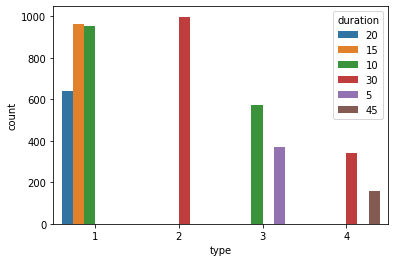

In [27]:
sns.countplot(data = customer, x = customer['type'],hue = customer['duration'])

In [29]:
def group_tellertype(df: pd.DataFrame): 

    tellerStype1 = []
    tellerStype2 = []
    tellerStype3 = []
    tellerStype0 = []

    for id, val, mul in df.itertuples(index=False):

        if val == '1':

            tellerStype1.append((id,mul))

        if val == '2':
            tellerStype2.append((id,mul))

        if val == '3':
            tellerStype3.append((id,mul))

        if val == '0':
            tellerStype0.append((id,mul))
    
    return tellerStype1,tellerStype2,tellerStype3,tellerStype0

In [30]:
tellerStype1, tellerStype2 ,tellerStype3 ,tellerStype0 = group_tellertype(teller)

In [46]:
print(len(tellerStype1))

print(len(tellerStype2))

print(len(tellerStype3))

print(len(tellerStype0))

29
50
50
20


In [33]:
print(len(customer))

print(len(tellerStype1))

5000
29


In [35]:



appointment_type1 = []
appointment_type2 = []
appointment_type3 = []
appointment_type4 = []

h = 0
x = 0 
y = 0
n = 0 

if h < int(len(list(customer))):
  for id, val, dur in customer.itertuples(index=False):
    if val == '1':
      appointment_type1.append((tellerStype1[h],id,dur))
      h+=1
    if h==len(tellerStype1) :
      h=0

if x < int(len(list(customer))):
  for id, val, dur in customer.itertuples(index=False):
    if val == '2':
      appointment_type2.append((tellerStype2[x],id,dur))
      x+=1
    if x==len(tellerStype2) :
      x=0

if y < int(len(list(customer))):
  for id, val, dur in customer.itertuples(index=False):

    if val == '3':
      appointment_type3.append((tellerStype3[y],id,dur))
      y+=1
    if y==len(tellerStype3) :
      y=0

if n < int(len(list(customer))):
  for id, val, dur in customer.itertuples(index=False):

    if val == '4':
      appointment_type4.append((tellerStype0[n],id,dur))
      n+=1
    if n==len(tellerStype0) :
      n=0

all_appointments = []

all_appointments.extend(appointment_type1)
all_appointments.extend(appointment_type2)
all_appointments.extend(appointment_type3)
all_appointments.extend(appointment_type4)



In [36]:

print(len(all_appointments))

5000


In [37]:
teller.to_csv('Test.csv')

In [38]:


df = pd.DataFrame(all_appointments, columns = ['t', 'customer_id', 'duration'])

df['teller_id'], df['multiplier'] = zip(*df.t)

df[["multiplier", "duration"]] = df[["multiplier", "duration"]].apply(pd.to_numeric)

df1 = df.drop(columns= 't')

df1['total_time'] = df1['duration'] * df1['multiplier']

df_group = df1.groupby('teller_id')['total_time'].agg(['sum','count']).reset_index().rename(columns = {"sum": "total_time", "count": "total_customers"})


In [39]:
df1 = df.drop(columns= 't')

df1.dtypes

customer_id     object
duration         int64
teller_id       object
multiplier     float64
dtype: object

In [40]:
df1['total_time'] = df1['duration'] * df1['multiplier']


In [41]:
df_group = df1.groupby('teller_id')['total_time'].agg(['sum','count']).reset_index().rename(columns = {"sum": "total_time", "count": "total_customers"})




In [53]:
print('The total max time is {} and min time {}'.format(df_group.total_time.max(), df_group.total_time.min()))

print('The total max customers assigned is {} and min {}'.format(df_group.total_customers.max(),df_group.total_customers.min()))

print('The total avg total time is {} and the avg total customer per teller {}'.format(df_group.total_time.mean(),df_group.total_customers.mean()))

The total max time is 963.75 and min time 116.0
The total max customers assigned is 89 and min 18
The total avg total time is 471.9748322147651 and the avg total customer per teller 33.557046979865774
